<a href="https://colab.research.google.com/github/Bharatsolanky/Bharatsolanky.github.io/blob/main/Milestone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Model for Breast Cancer Incidence
Bharat Solanky and Aadya Chawla

[Link to GitHub page ](https://bharatsolanky.github.io/)
## Project Goals:

The goal of this project is to produce a predictive model to determine likelihood of breast cancer incidence in female patients using physical metrics, such as concavity, radius, and texture of perceived benign tumors. 

## Project DataSet and Plan:

The dataset we plan to work with is from [Kaggle.com](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download). As background, the medical journals report that the accuracy of visually diagnosed breast FNA is about 94.3% with mean sensitivity of 91 percent and specificity of 87%.
The dataset will be randomly divided into two disjoint subgroups, first to train the prediction model and other for testing the accuracy of the developed models. 
Based on  preliminary analysis, the three features which are highly associated with the diagnosis of breast cancer are the following (the description of variables is below):

1. Concave_points_worst: The average value for cancer is 0.18, whereas it is 0.07 for benign;
2. Radius_worst: The average value for cancer is 21.13, whereas it is 13.38 for benign; and
3. Texture_worst: The average value for cancer is 29.32 whereas it is 23.52 for benign;

Our goal is to also provide guidelines for medical professionals to assist them with the process of visual diagnosis (prediction) by identifying potentially extreme values above/below which the likelihood of breast cancer changes significantly. For example, for what value of  Radius_worst does the possibility of cancer have a likelihood of 95% or 100%. 


## Collaboration Plan:
We have created a google colab drive to share files and so that we can easily edit and write code live. We will meet weekly leading up to each deadline to divide the work and enhance our project objectives. Currently, we use text message to communicate with each other. We plan on finding one more dataset by November 18 for Milestone 2.

## ETL (Extraction, Transform, and Load):
We loaded one dataset .csv file available on the Kaggle.com website. 
This dataset has information of 32 features described above for 569 patients. 
The download does not have any missing data for any of the features.


###Filtering, Sorting, and Plotting Data Points
Below we have filtered data by malignant patient type, sorted to only show concavity points of their cells, and plotted it as a histogram.


In [ ]:
#mounting google collab to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pwd

#directory contains csv file
%cd /content/drive/My Drive/ColabNotebooks
!git pull


import pandas as pd
pd.options.display.max_rows = 8

df = pd.read_csv("data.csv") 
#This reads the data file which is named data.csv

df.head()

/content/drive/My Drive/ColabNotebooks
/content/drive/My Drive/ColabNotebooks
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.dtypes
#dtypes for certain variables within the dataset

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
                            ...   
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
Unnamed: 32                float64
Length: 33, dtype: object

The new dataframe rd (below) was created to establish a relationship between "radius_worst" and "radius_mean" and its "radius_se" to understand how many standard errors away from the mean that *nearly all* of the diagnoses are *malignant*. This is a step we can use to help guide our question searching process.

In [ ]:
rd = df[df["radius_worst"] > (df["radius_mean"] + 11 * df["radius_se"])]
rd["diagnosis"].value_counts()


M    15
Name: diagnosis, dtype: int64

In [ ]:
df.concavity_worst.mean()

0.27218848330404216

This line of code finds the mean of the concave points of the cell nucleus of each person's tumor, wether malignant or benign.

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
M,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
M,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
M,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
M,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
M,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


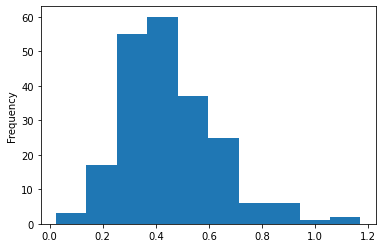

In [ ]:
#Sets M equal to the dataframe's "M" column, which stands for malignant tumor patients
M = df.set_index("diagnosis").loc["M"]
display(M.head())
M.concavity_worst.plot.hist()

**A diagnosis of 'M' signifies that the cell is malignant. This graph is a histogram of all of the concavity points of malignant cells. This could help us later understand which concavity point most frequently signifies a cancerous cell. **

In [ ]:
%%shell
#pwd
jupyter nbconvert --to html ///content/drive/MyDrive/ColabNotebooks/Milestone1.ipynb

[NbConvertApp] Converting notebook ///content/drive/MyDrive/ColabNotebooks/Milestone1.ipynb to html
[NbConvertApp] Writing 306111 bytes to ///content/drive/MyDrive/ColabNotebooks/Milestone1.html


In [ ]:
#git clone https://github.com/bharatsolanky/bharatsolanky.github.io